In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from colorama import Fore # Make text color full

In [2]:
# Librarys for preprocessing
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk import SnowballStemmer

In [3]:
data_train = pd.read_csv('Corona_NLP_train.csv')
data_test = pd.read_csv('Corona_NLP_test.csv')
data_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
data_test.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1600,1601,46553,NaN,13-03-2020,Call your healthcare provider if you think you...,Positive
2375,2376,47328,"Texas, USA",14-03-2020,All prices dropping down except premium and on...,Neutral
2955,2956,47908,"Sunderland, England",15-03-2020,If youre a healthy adult &amp; youve got mor...,Positive
371,372,45324,NaN,12-03-2020,Airlines: Plane ticket prices are dropping bec...,Extremely Negative
170,171,45123,United States,11-03-2020,I demand all food servers to wear gloves when ...,Negative
1770,1771,46723,NaN,13-03-2020,This was at our little grocery store earlier i...,Positive
1487,1488,46440,"Nashville, TN",13-03-2020,Were good. No need to bull rush the grocery s...,Positive
2146,2147,47099,NaN,13-03-2020,Dirty bird at grocery store just bought last d...,Neutral
2567,2568,47520,NaN,14-03-2020,finding hand sanitizer at the supermarket #Cov...,Positive
3299,3300,48252,NaN,15-03-2020,Everyone: COVID-19 panic!! Buy toilet paper an...,Negative


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [7]:
data_train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [8]:
data_test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [9]:
# Percentage of missing value in training dataset Location column.

percent_null = data_train['Location'].isnull().sum() / len(data_train['Location'])* 100
percent_null


20.87129771363316

In [10]:
# Percentage of missing value in test dataset Location column
test_null_percent = data_test['Location'].isnull().sum() / len(data_test['Location'])* 100
test_null_percent

21.958925750394943

In [11]:
col = ['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment']

In [12]:
# Cheching Unique value count in Each column
for col in data_train:
    print('Unique value counnt in %s' %col)
    print(data_train[col].nunique())

Unique value counnt in UserName
41157
Unique value counnt in ScreenName
41157
Unique value counnt in Location
12220
Unique value counnt in TweetAt
30
Unique value counnt in OriginalTweet
41157
Unique value counnt in Sentiment
5


In [13]:
# Checking Unique values in those column which has less unique value count(columns are TweetAt and Sentiment).
uni_col = ['TweetAt','Sentiment','Location']
for uni_col in data_train[['TweetAt','Sentiment','Location']]:
    print('\nUnique values in %s' %uni_col)
    print(data_train[uni_col].unique())


Unique values in TweetAt
['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']

Unique values in Sentiment
['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']

Unique values in Location
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


In [14]:
for col in data_test:
    print('Unique value counnt in %s' %col)
    print(data_test[col].nunique())

Unique value counnt in UserName
3798
Unique value counnt in ScreenName
3798
Unique value counnt in Location
1717
Unique value counnt in TweetAt
15
Unique value counnt in OriginalTweet
3798
Unique value counnt in Sentiment
5


In [15]:
uni_col = ['TweetAt','Sentiment']
for uni_col in data_test[['TweetAt','Sentiment']]:
    print('\nUnique values in %s' %uni_col)
    print(data_test[uni_col].unique())


Unique values in TweetAt
['02-03-2020' '03-03-2020' '04-03-2020' '05-03-2020' '06-03-2020'
 '07-03-2020' '08-03-2020' '09-03-2020' '10-03-2020' '11-03-2020'
 '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020' '16-03-2020']

Unique values in Sentiment
['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']


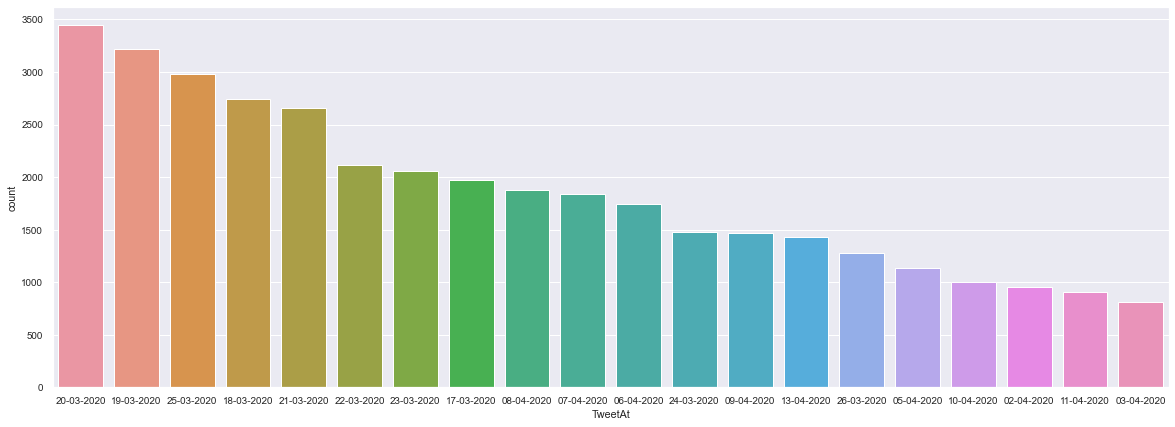

In [16]:
# Select Top 20 date where people tweeted most.
plt.figure(figsize=(20,7))
df_tweet = data_train['TweetAt']
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=0.9)
sns.countplot(x= df_tweet, data=data_train,order=data_train['TweetAt'].value_counts().index[:20])
plt.show()

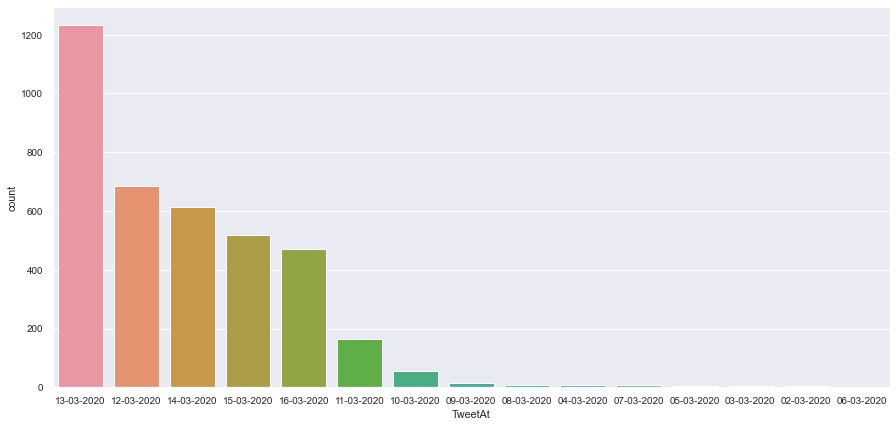

In [17]:
# doing same for test data set.
plt.figure(figsize=(15,7))
df_tweet = data_test['TweetAt']
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=0.9)
sns.countplot(x= df_tweet, data=data_test,order=data_test['TweetAt'].value_counts().index[:15])
plt.show()

* Maximum tweet happends in march month.

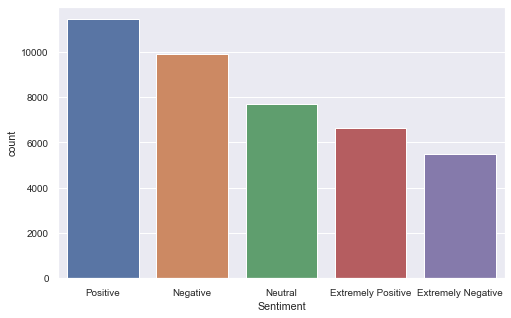

In [18]:
plt.figure(figsize=(8,5))
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=0.9)
sns.countplot(x= data_train['Sentiment'], data= data_train,order=data_train['Sentiment'].value_counts().index)
plt.show()

* In this dataset we have highest positive tweets followed by Negative, Neutral and so on.

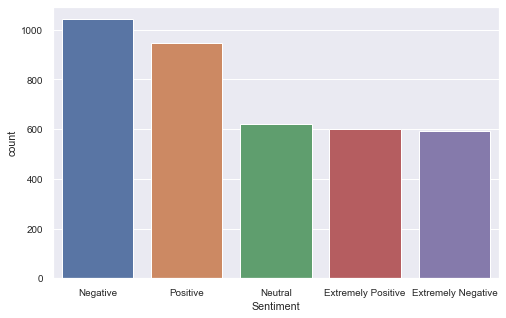

In [19]:
# Test dataset

plt.figure(figsize=(8,5))
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=0.9)
sns.countplot(x= data_test['Sentiment'], data= data_test,order=data_test['Sentiment'].value_counts().index)
plt.show()

In [20]:
# Converting Sentiments into 3 categori Positive, Negative and Neutral.
# Merging Extremely Positive tweets with Positive and Extremely Negative with Negative.
# Creating dictionry
label = {'Extremely Positive':2,'Positive':2,'Neutral':0,'Negative':1,'Extremely Negative':1}

data_train['Sentiment'] = [label[x] for x in data_train['Sentiment']]
data_test['Sentiment'] = [label[x] for x in data_test['Sentiment']]

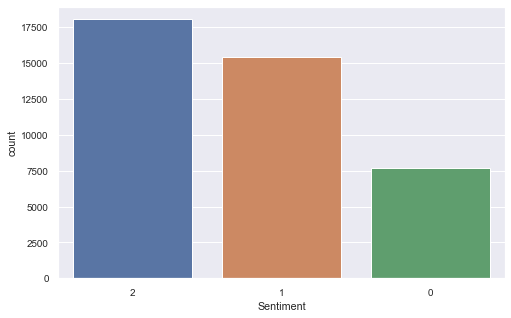

In [21]:
# Train dataset

plt.figure(figsize=(8,5))
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=0.9)
sns.countplot(x= data_train['Sentiment'], data= data_train,order=data_train['Sentiment'].value_counts().index)
plt.show()

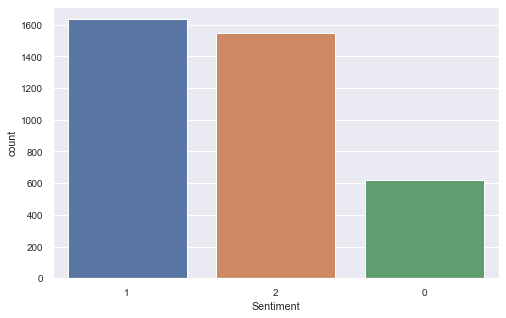

In [22]:
# Test dataset

plt.figure(figsize=(8,5))
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=0.9)
sns.countplot(x= data_test['Sentiment'], data= data_test,order=data_test['Sentiment'].value_counts().index)
plt.show()

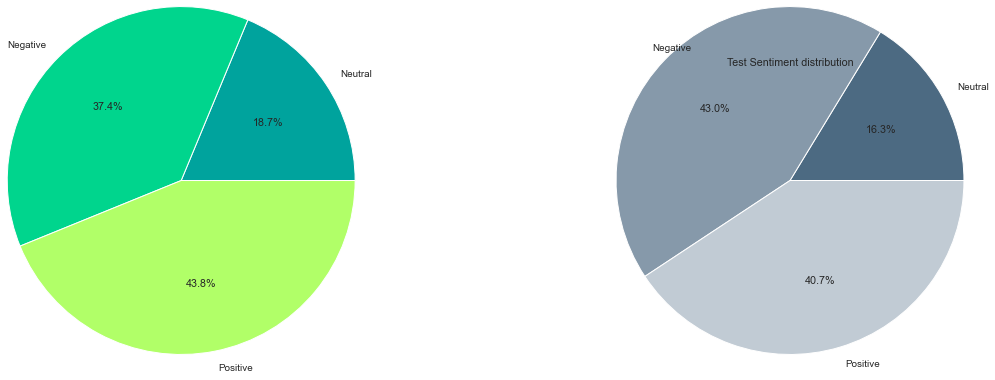

In [23]:
# Pie Chart for Train sentiment.
plt.subplot(1,1,1)
plt.title('Train Sentiment distribution')
train_sen0 = len(data_train[data_train['Sentiment'].values==0])
train_sen1 = len(data_train[data_train['Sentiment'].values==1])
train_sen2 = len(data_train[data_train['Sentiment'].values==2])
colors = ['#00a39d', '#00d58d', '#b1ff68']
plt.pie([train_sen0,train_sen1,train_sen2], labels=['Neutral','Negative','Positive'], 
        radius=2,autopct='%0.1f%%', colors = colors)



# Pie Chart for Test sentiment.
plt.subplot(1,1,1)
plt.title('Test Sentiment distribution')
colors = ['#4c6a82', '#8699aa', '#c1cbd4']
test_sen0 = len(data_test[data_test['Sentiment'].values==0])
test_sen1 = len(data_test[data_test['Sentiment'].values==1])
test_sen2 = len(data_test[data_test['Sentiment'].values==2])
plt.pie([test_sen0,test_sen1,test_sen2], labels=['Neutral','Negative','Positive'], 
        radius=2,autopct='%0.1f%%',colors = colors,center=(7, 0))

plt.show()

In [24]:
sentiment_0=data_train[data_train['Sentiment']==0]['OriginalTweet'].str.len()
sentiment_1=data_train[data_train['Sentiment']==1]['OriginalTweet'].str.len()
sentiment_2=data_train[data_train['Sentiment']==2]['OriginalTweet'].str.len()

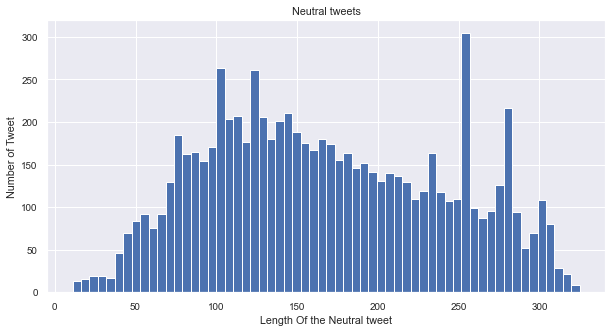

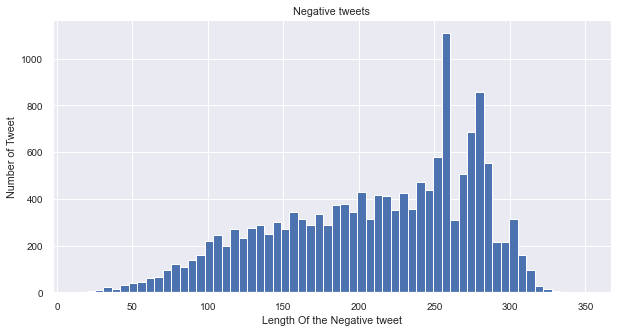

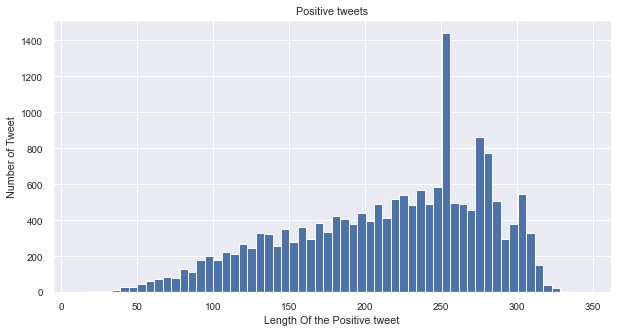

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.hist(sentiment_0,bins=60)
plt.xlabel('Length Of the Neutral tweet')
plt.ylabel('Number of Tweet')
plt.title('Neutral tweets')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.hist(sentiment_1,bins=60)
plt.xlabel('Length Of the Negative tweet')
plt.ylabel('Number of Tweet')
plt.title('Negative tweets')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.hist(sentiment_2,bins=60)
plt.xlabel('Length Of the Positive tweet')
plt.ylabel('Number of Tweet')
plt.title('Positive tweets')
plt.show()

* Checking Length of the tweets grouping by their Sentiments category.

In [26]:
len_neutral=data_train[data_train['Sentiment']==0]['OriginalTweet'].str.split().map(lambda x: len(x))
len_negative=data_train[data_train['Sentiment']==1]['OriginalTweet'].str.split().map(lambda x: len(x))
len_positive=data_train[data_train['Sentiment']==2]['OriginalTweet'].str.split().map(lambda x: len(x))

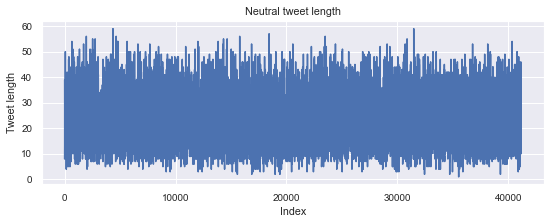

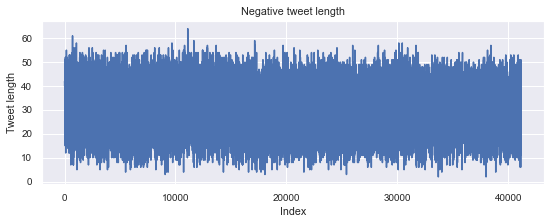

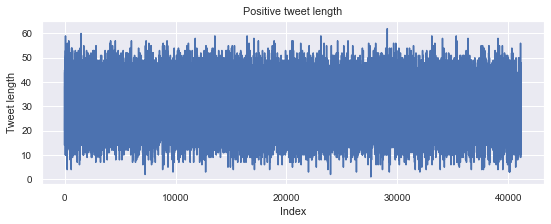

In [27]:
plt.figure(figsize=(9,3))
plt.subplot(1,1,1)
sns.lineplot(x=len_neutral.index,y=len_neutral,)
plt.title('Neutral tweet length')
plt.xlabel('Index')
plt.ylabel('Tweet length')
plt.show()

plt.figure(figsize=(9,3))
plt.subplot(1,1,1)
sns.lineplot(x=len_negative.index,y=len_negative,)
plt.title('Negative tweet length')
plt.xlabel('Index')
plt.ylabel('Tweet length')
plt.show()

plt.figure(figsize=(9,3))
plt.subplot(1,1,1)
sns.lineplot(x=len_positive.index,y=len_positive,)
plt.title('Positive tweet length')
plt.xlabel('Index')
plt.ylabel('Tweet length')
plt.show()

In [28]:
# Selecting Only 2 columns OriganalTweet and Sentiment which we need for this task.

# Stopword
stopword = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemm = SnowballStemmer('english')
# Defining function for removinng Punctuation and join.

def clean_tweets(txt):
    no_link = re.sub(r'(https?://(www\.)?(\w+)(\.\w+))',' ',txt) # this will remove Link in tweets
    x_notpunt = "".join([c for c in no_link if c not in string.punctuation]) # Remove Punctuations
    txt = re.sub(r'\[[0-9]*\]',' ',x_notpunt) # Remove digits
    txt=re.sub(r'[^\w\s]', '', str(txt).lower().strip()) # it will remove evrything except words and space
    txt = re.sub(r'\d',' ',txt) # remove sigle digit
    tokens= word_tokenize(txt) # Word Tokenizing
    clean_txt = [lemmatizer.lemmatize(word) for word in tokens if word not in stopword] # Remove stopwords and lemmatizing words
    return clean_txt

In [29]:
def clean_tweets2(txt):
    no_link = re.sub(r'(https?://(www\.)?(\w+)(\.\w+))',' ',txt) # this will remove Link in tweets
    x_notpunt = "".join([c for c in no_link if c not in string.punctuation]) # Remove Punctuations
    txt = re.sub(r'\[[0-9]*\]',' ',x_notpunt) # Remove digits
    txt=re.sub(r'[^\w\s]', '', str(txt).lower().strip()) # it will remove evrything except words and space
    txt = re.sub(r'\d',' ',txt) # remove sigle digit
    tokens= word_tokenize(txt) # Word Tokenizing
    clean_txt = [stemm.stem(word) for word in tokens if word not in stopword] # Remove stopwords and lemmatizing words
    return clean_txt

In [30]:
train = data_train[['OriginalTweet','Sentiment']]
test = data_test[['OriginalTweet','Sentiment']]

In [31]:
test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,1
1,When I couldn't find hand sanitizer at Fred Me...,2
2,Find out how you can protect yourself and love...,2
3,#Panic buying hits #NewYork City as anxious sh...,1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,2
3794,Did you panic buy a lot of non-perishable item...,1
3795,Asst Prof of Economics @cconces was on @NBCPhi...,0
3796,Gov need to do somethings instead of biar je r...,1


In [32]:
train['CleanText'] = train['OriginalTweet'].apply(lambda x: clean_tweets(x))


In [33]:
train

,OriginalTweet,Sentiment,CleanText
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,"[menyrbie, philgahan, chrisitv, ifz, fan, pa, ..."
1,advice Talk to your neighbours family to excha...,2,"[advice, talk, neighbour, family, exchange, ph..."
2,Coronavirus Australia: Woolworths to give elde...,2,"[coronavirus, australia, woolworth, give, elde..."
3,My food stock is not the only one which is emp...,2,"[food, stock, one, empty, please, dont, panic,..."
4,"Me, ready to go at supermarket during the #COV...",1,"[ready, go, supermarket, covid, outbreak, im, ..."
...,...,...,...
41152,Airline pilots offering to stock supermarket s...,0,"[airline, pilot, offering, stock, supermarket,..."
41153,Response to complaint not provided citing COVI...,1,"[response, complaint, provided, citing, covid,..."
41154,You know its getting tough when @KameronWilds...,2,"[know, getting, tough, kameronwilds, rationing..."
41155,Is it wrong that the smell of hand sanitizer i...,0,"[wrong, smell, hand, sanitizer, starting, turn..."


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer= clean_tweets, ngram_range=(1, 3), stop_words='english', max_features=90000,max_df=0.7,min_df=2)

# Fitting the Tfidf on raw data
X_train = tfidf.fit_transform(train['OriginalTweet'])
y_train = train['Sentiment']

# Use below line insted of matrix if you want to do hyper parameter tunning and convert tfidf into array.
#X_train = pd.DataFrame(X_train.toarray())

# Convert sparse matrix to dataframe
X_train = pd.DataFrame.sparse.from_spmatrix(X_train)
X_train.sample(20)

,0,1,2,3,4,5,6,7,8,9,...,21446,21447,21448,21449,21450,21451,21452,21453,21454,21455
4018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Fitting the Tfidf on raw data

x_test = tfidf.transform(test['OriginalTweet'])
y_test = test['Sentiment']

# Use below line insted of matrix if you want to do hyper parameter tunning and convert tfidf into array.
#x_test = pd.DataFrame(x_test.toarray())

# Convert sparse matrix to dataframe
x_test = pd.DataFrame.sparse.from_spmatrix(x_test)
x_test.sample(20)

,0,1,2,3,4,5,6,7,8,9,...,21446,21447,21448,21449,21450,21451,21452,21453,21454,21455
2963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
#List of models to check
models = []
models.append(("MultinomialNB",MultinomialNB()))
models.append(("LogisticRegression",LogisticRegression(solver='lbfgs')))
models.append(("LinearSVC", LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

In [38]:
#Evaluate function which prints some crucial metrics
def model_report(predicted, true, avg="weighted"):
    print("Precision: ", precision_score(predicted, true, average=avg))
    print("Recall: ", recall_score(predicted, true, average=avg))
    print("F1: ", f1_score(predicted,true, average=avg))
    print("Classification Report", classification_report(predicted,true))
    print("Accuracy Score", accuracy_score(predicted,true))

In [39]:
#Check diffrent models
for name, model in models:
    text_train = Pipeline([(name, model)])
    model=text_train.fit(X_train, y_train)
    print(Fore.GREEN+'\33[1m'+'\033[4m'+ name +'\033[0m')
    print('\n')
    print(Fore.BLUE+'\033[1m'+"Train set"+ '\033[0m')
    model_report(model.predict(X_train), y_train)
    print('\n')
    print(Fore.BLUE+'\033[1m'+"Test set"+ '\033[0m')
    model_report(model.predict(x_test), y_test)
    print(Fore.RED+'\033[1m'+'\033[4m' +'________________________________________________________________________________________________\n'+ '\033[0m')
    print("\n")

MultinomialNB


Train set
Precision:  0.8466815286051488
Recall:  0.7377116893845518
F1:  0.7722532991524692
Classification Report               precision    recall  f1-score   support

           0       0.20      0.96      0.33      1583
           1       0.79      0.79      0.79     15297
           2       0.93      0.69      0.79     24277

    accuracy                           0.74     41157
   macro avg       0.64      0.81      0.64     41157
weighted avg       0.85      0.74      0.77     41157

Accuracy Score 0.7377116893845518


Test set
Precision:  0.782686842676614
Recall:  0.6500789889415481
F1:  0.6982835180886853
Classification Report               precision    recall  f1-score   support

           0       0.04      0.81      0.08        31
           1       0.68      0.73      0.71      1515
           2       0.86      0.59      0.70      2252

    accuracy                           0.65      3798
   macro avg       0.53      0.71      0.49      3798
weighted avg 

* Doing RandommizeSearchCV to narrow down the parameter options for GridDearchCV.